In [2]:
#Imports
import os
import scanpy as sc
import matplotlib
import tensorflow as tf
import anndata
from scipy import sparse
from sklearn.preprocessing import OneHotEncoder
import scib


In [4]:
#---Prepare Data---
dataset_name = 'large_atac_gene_activity'
label_key = 'cell_type'
batch_key = 'batch'

#set base path to load data: goes back one directory and then into the data
base_path = os.path.join('..', 'data')

# read dataset into an anndata object:  Category - Cells of the brain
inPath = os.path.join(base_path, f"{dataset_name}.h5ad")
adata = sc.read(inPath)

matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)
adata

c:\Users\lklei\anaconda3\envs\scib\lib\site-packages\anndata\_io\specs\registry.py:281: OldFormatWarning: Element '/layers' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)
c:\Users\lklei\anaconda3\envs\scib\lib\site-packages\anndata\_io\specs\registry.py:281: OldFormatWarning: Element '/layers/counts' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)
c:\Users\lklei\anaconda3\envs\scib\lib\site-packages\anndata\_io\utils.py:215: OldFormatWarning: Element '/obs/__categories/batchname' was written without encoding metadata.
  return func(*args, **kwargs)
c:\Users\lklei\anaconda3\envs\scib\lib\site-packages\anndata\_io\utils.py:215: OldFormatWarning: Element '/obs/batchname' was written without encoding metadata.
  return func(*args, **kwargs)
c:\Users\lklei\anaconda3\envs\scib\lib\site-packages\anndata\_io\utils.py:215: OldFormatWarning: Element '/obs/__categories/batchname_all'

AnnData object with n_obs × n_vars = 84813 × 3580
    obs: 'batchname', 'batchname_all', 'final_cell_label'
    layers: 'counts'

Dataset before integration:


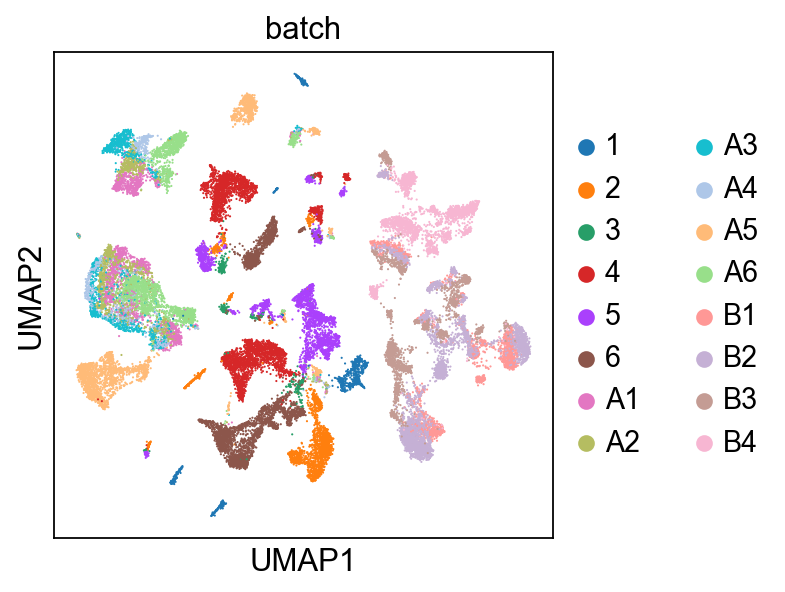

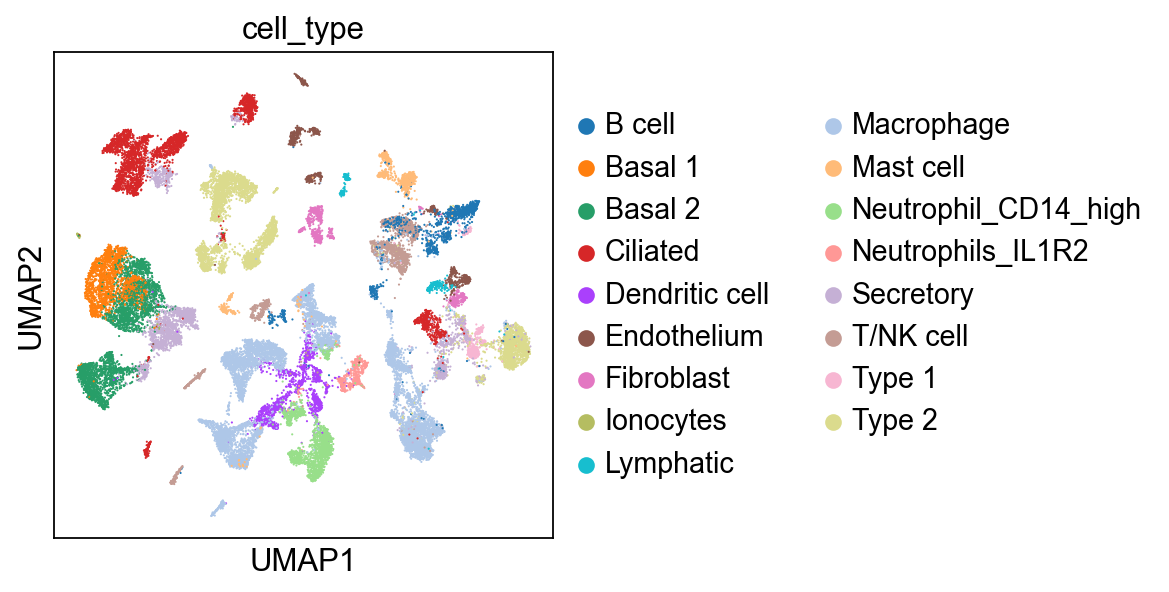

In [ ]:
# --- Plot original data ---
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)
print("Dataset before integration:")
sc.pp.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=25)
sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[batch_key], show=True, use_raw=False)
sc.pl.umap(adata, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[label_key], show=True, use_raw=False)


In [25]:
sc.pp.combat(adata, batch_key)


c:\Users\lklei\anaconda3\envs\scib\lib\site-packages\scanpy\preprocessing\_combat.py:347: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


In [26]:
adata

AnnData object with n_obs × n_vars = 32472 × 15148
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    layers: 'counts'

Dataset after integration using autoencoder:


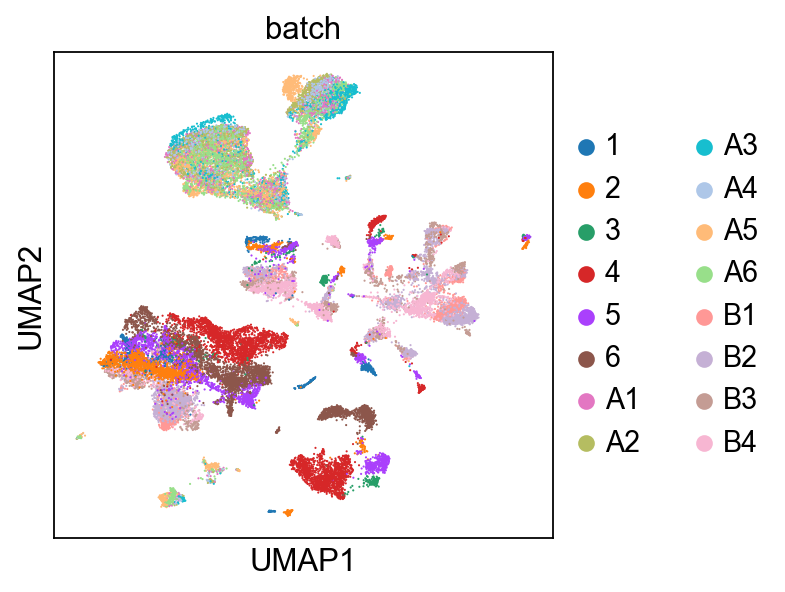

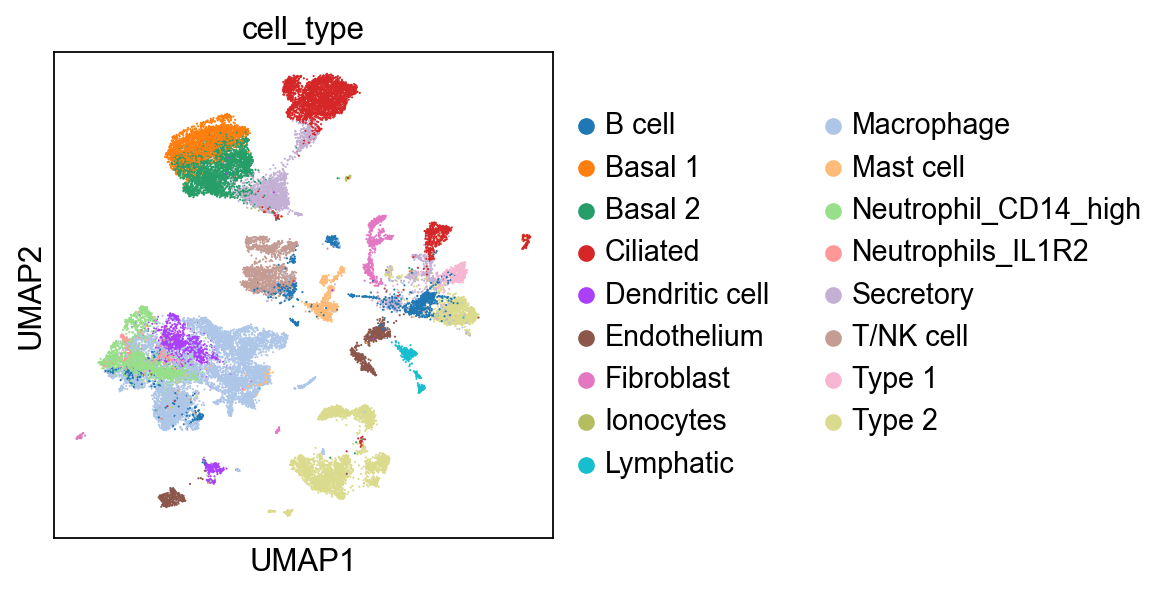

In [27]:
# --- Plot integrated data --- combat
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)


print("Dataset after integration using autoencoder:")
sc.pp.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=25)
sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[batch_key], show=True, use_raw=False)
sc.pl.umap(adata, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[label_key], show=True, use_raw=False)


In [28]:
adata

AnnData object with n_obs × n_vars = 32472 × 15148
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    uns: 'pca', 'neighbors', 'umap', 'batch_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [45]:
def integrate(ad, batch_key, label_key, alg):
    if alg == 'combat':
        sc.pp.combat(ad, batch_key)
    elif alg == 'harmony':
        scib.integration.harmony(ad, batch_key, hvg=None)
    elif alg == 'scanorama':
        scib.integration.scanorama(ad, batch_key, hvg=None)
    elif alg == 'scgen':
        scib.integration.scgen(ad, batch_key, label_key, epochs=20, hvg=None)
    elif alg == 'nbc':
        ad = nbc.integration(ad, label_key, batch_key, epochs=40, batch=128)    
    return ad

c:\Users\lklei\anaconda3\envs\scib\lib\site-packages\scanpy\preprocessing\_combat.py:347: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


Dataset after integration using autoencoder:


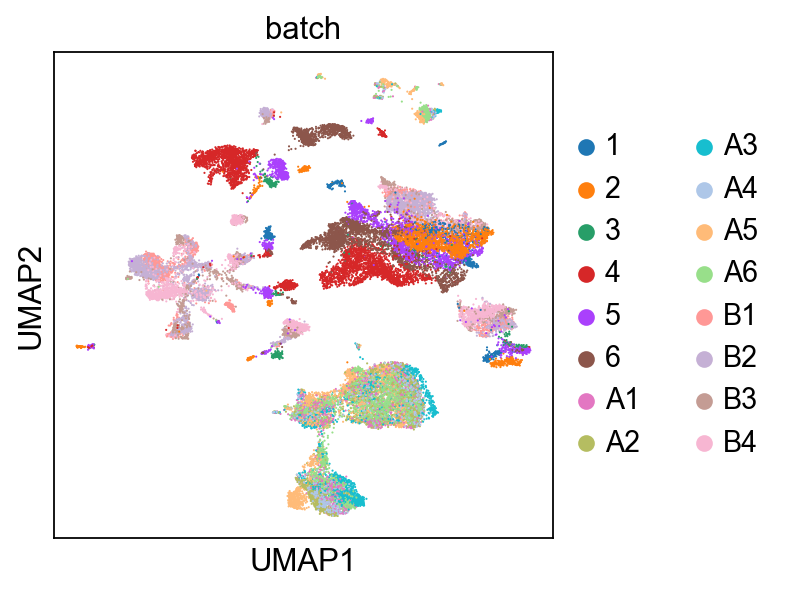

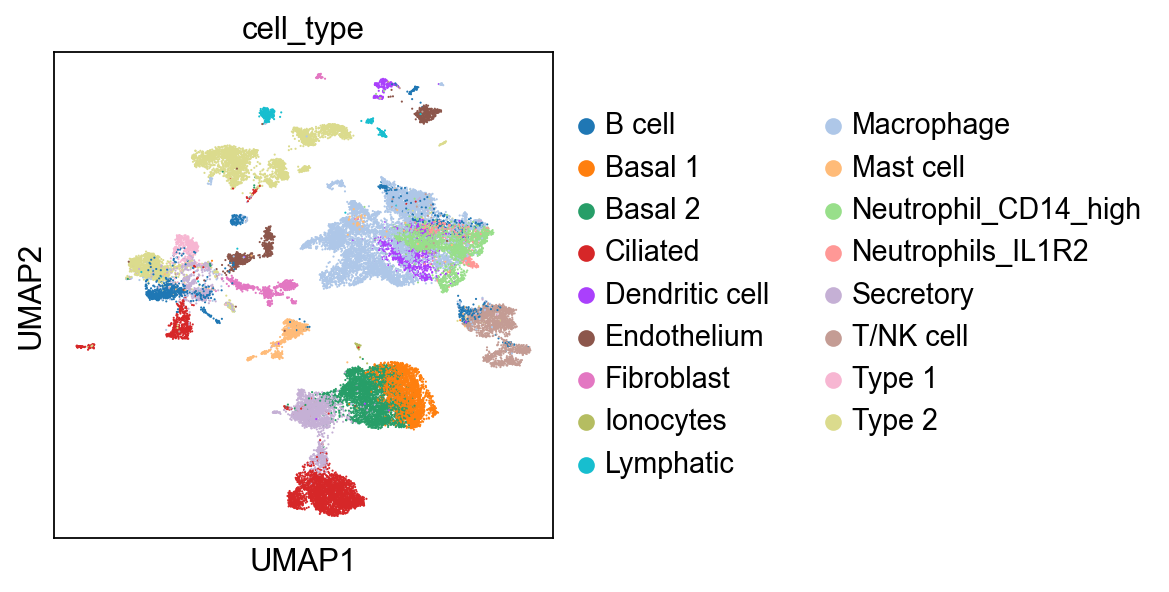

In [35]:
# --- Plot integrated data --- combat

integrated = integrate(adata, batch_key, label_key, 'combat')

print("Dataset after integration using autoencoder:")
sc.pp.pca(integrated, svd_solver="arpack")
sc.pp.neighbors(integrated, n_neighbors=25)
sc.tl.umap(integrated, random_state=42)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[batch_key], show=True, use_raw=False)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[label_key], show=True, use_raw=False)


In [49]:
integrated = integrate(adata, batch_key, label_key, 'harmony')

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
Reach convergence after 4 iteration(s).


In [62]:
scib.integration.desc(adata, batch_key, res=0.8, ncores=None, tmp_dir=None, use_gpu=False, gpu_id=None)

OptionalDependencyNotInstalled: 
'desc' is an optional dependency and not installed by default. Please make sure you install it manually.

In [50]:
print(integrated.X)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 63423541 stored elements and shape (32472, 15148)>
  Coords	Values
  (0, 29)	1.2873256206512451
  (0, 299)	1.2873256206512451
  (0, 539)	1.2873256206512451
  (0, 704)	1.2873256206512451
  (0, 708)	1.2873256206512451
  (0, 709)	1.2873256206512451
  (0, 748)	1.2873256206512451
  (0, 900)	1.2873256206512451
  (0, 904)	1.2873256206512451
  (0, 923)	1.2873256206512451
  (0, 925)	1.2873256206512451
  (0, 941)	1.2873256206512451
  (0, 1021)	1.2873256206512451
  (0, 1084)	1.2873256206512451
  (0, 1135)	1.8319681882858276
  (0, 1170)	1.2873256206512451
  (0, 1194)	1.8319681882858276
  (0, 1253)	1.2873256206512451
  (0, 1270)	1.2873256206512451
  (0, 1389)	1.2873256206512451
  (0, 1622)	1.2873256206512451
  (0, 1650)	1.2873256206512451
  (0, 1672)	1.2873256206512451
  (0, 1768)	1.2873256206512451
  (0, 1787)	1.2873256206512451
  :	:
  (32471, 14614)	0.7971258163452148
  (32471, 14631)	1.0191913843154907
  (32471, 14632)	0.740645110607

In [58]:
adata

AnnData object with n_obs × n_vars = 32472 × 15148
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    uns: 'pca'
    obsm: 'X_pca', 'X_emb'
    varm: 'PCs'
    layers: 'counts'

Dataset after integration using autoencoder:


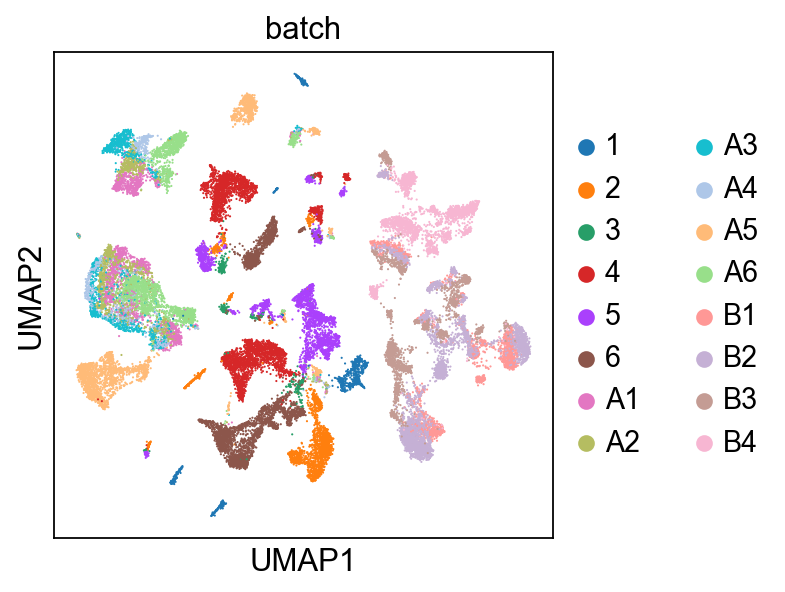

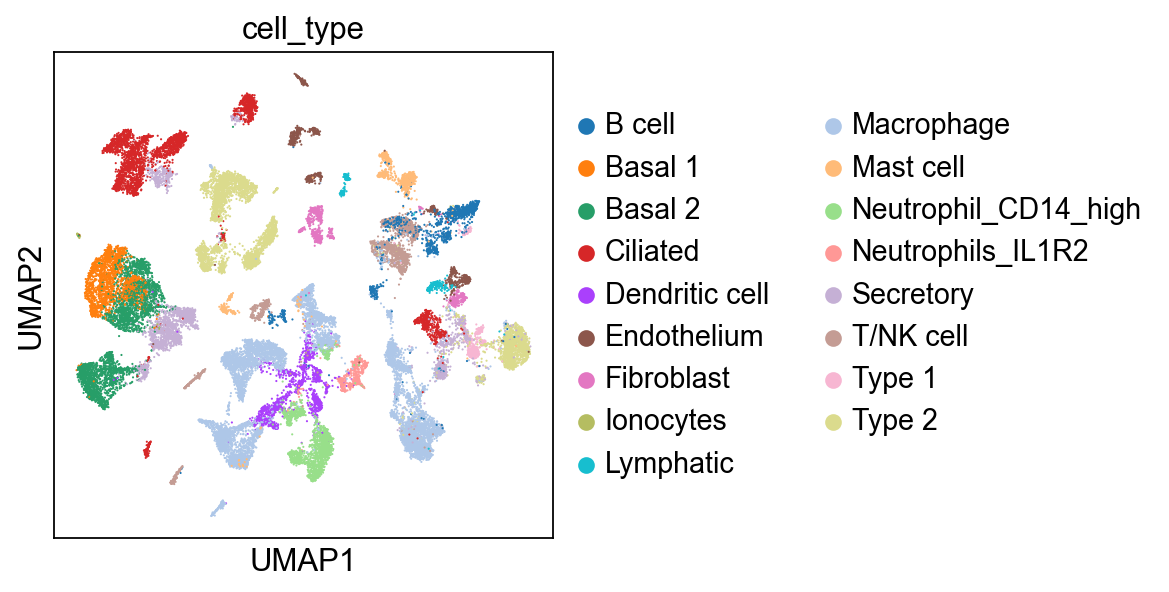

In [60]:
# --- Plot integrated data --- harmony
print("Dataset after integration using autoencoder:")
""""
sc.pp.pca(integrated, svd_solver="arpack")
"""
sc.pp.neighbors(adata, n_neighbors=25)
sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[batch_key], show=True, use_raw=False)
sc.pl.umap(adata, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[label_key], show=True, use_raw=False)

Dataset after integration using autoencoder:


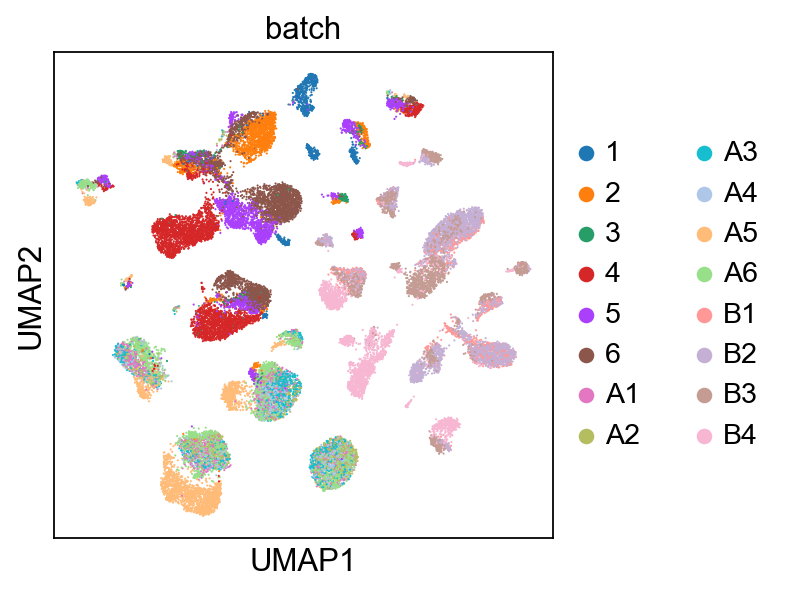

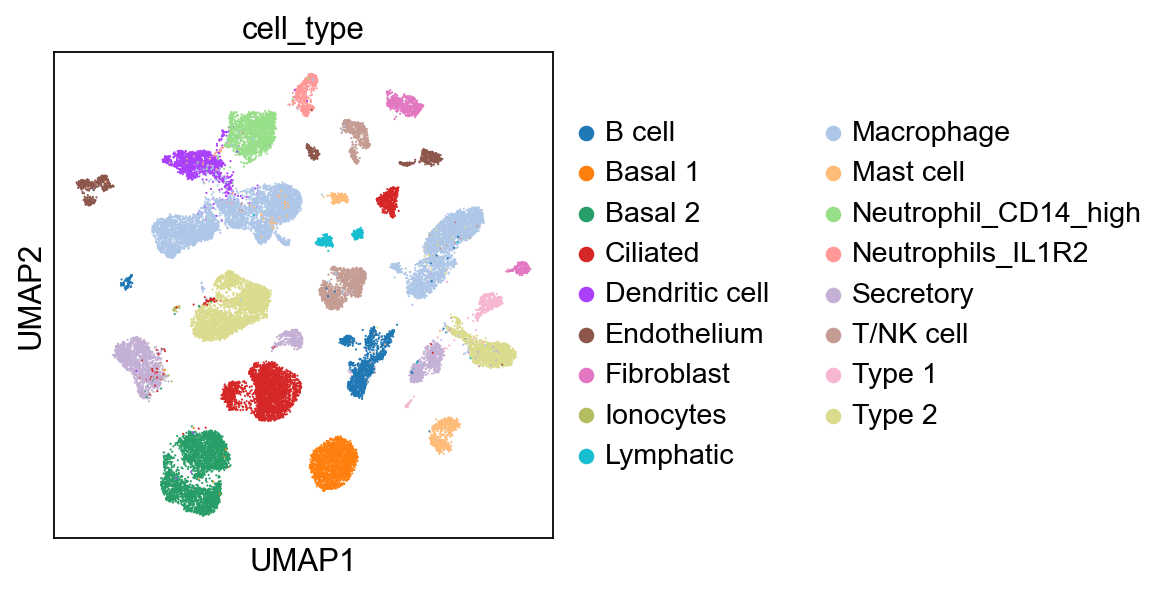

In [8]:
# --- Plot integrated data --- one step. unfrozen weights
print("Dataset after integration using autoencoder:")
sc.pp.pca(integrated, svd_solver="arpack")
sc.pp.neighbors(integrated, n_neighbors=25)
sc.tl.umap(integrated, random_state=42)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[batch_key], show=True, use_raw=False)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[label_key], show=True, use_raw=False)

Dataset after integration using autoencoder:


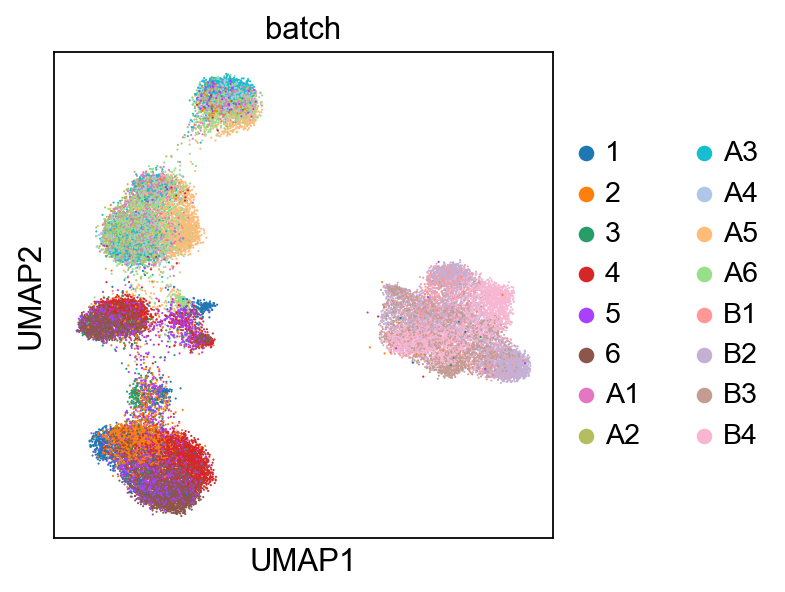

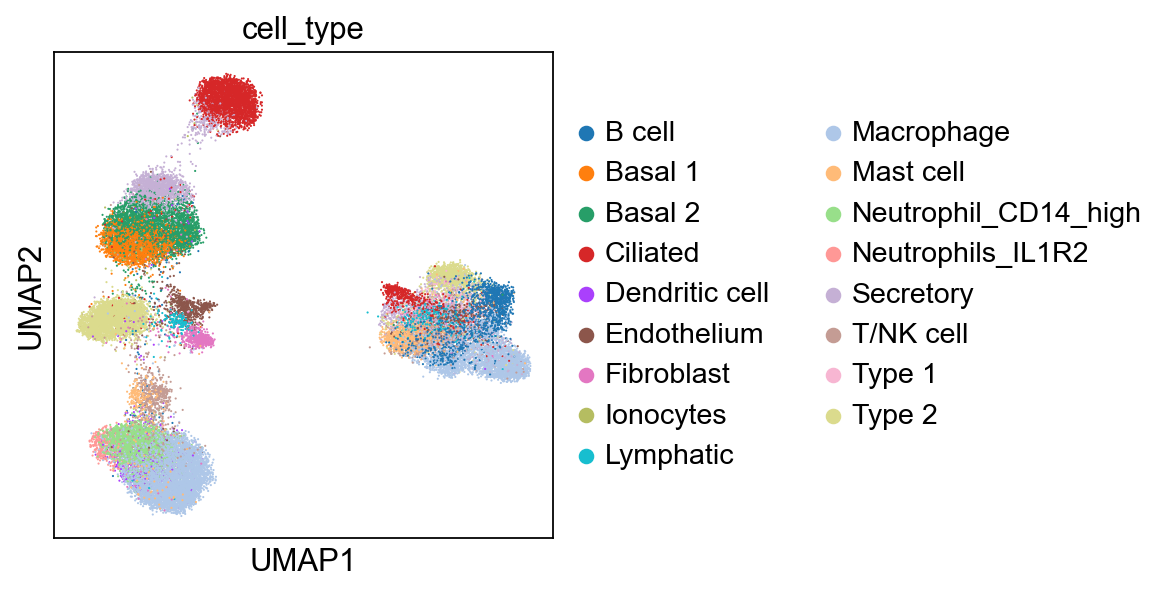

In [42]:
# --- Plot integrated data --- untrained

print("Dataset after integration using autoencoder:")
sc.pp.pca(integrated, svd_solver="arpack")
sc.pp.neighbors(integrated, n_neighbors=25)
sc.tl.umap(integrated, random_state=42)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[batch_key], show=True, use_raw=False)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[label_key], show=True, use_raw=False)


Dataset after integration using autoencoder:


c:\Users\lklei\anaconda3\envs\scib\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


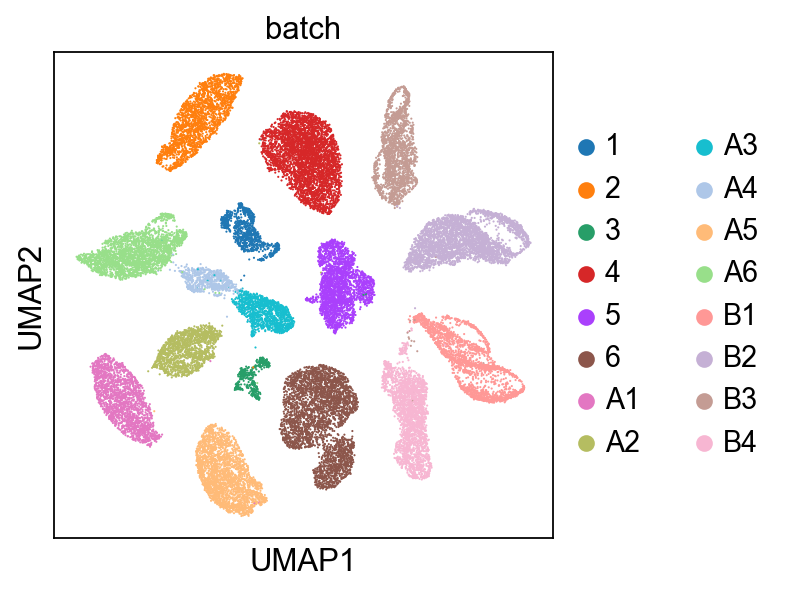

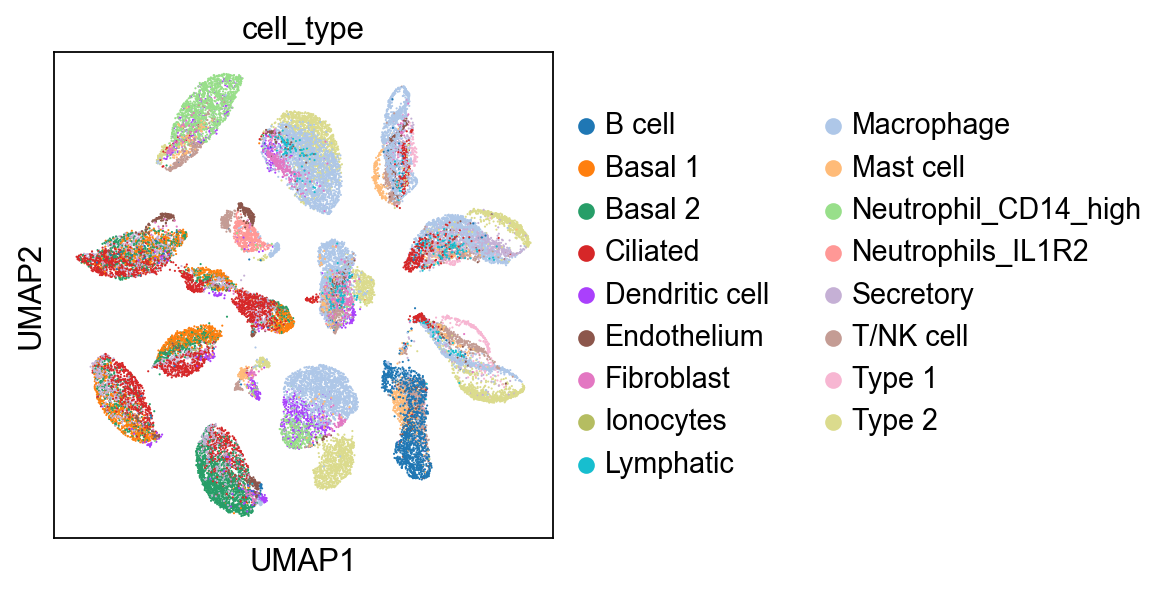

In [4]:
# --- Plot integrated data --- one-step trained

print("Dataset after integration using autoencoder:")
sc.pp.pca(integrated, svd_solver="arpack")
sc.pp.neighbors(integrated, n_neighbors=25)
sc.tl.umap(integrated, random_state=42)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[batch_key], show=True, use_raw=False)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[label_key], show=True, use_raw=False)

In [ ]:
#set base path to load data: goes back one directory and then into the data
base_path = os.path.join('..', 'src', 'models', 'saved_models')
name = "autoencoder_adverserialtrained"

# load autoencoder
inPath = os.path.join(base_path, f"{name}.keras")
autoencoder = tf.keras.models.load_model(inPath)
print(autoencoder.input_shape)

#Data preperation: adata to Tensorflow dataset
#ADATA->NUMPY
GENE_EXPRESSION = adata.X.toarray()
#One-hot encoding the Cell Types
encoder = OneHotEncoder(sparse_output=False)  # `sparse=False` returns a dense array
CELL_TYPES = encoder.fit_transform(adata.obs[[label_key]])
BATCH_LABELS = encoder.fit_transform(adata.obs[[batch_key]])

    #Combine NUMPY and One-hot encoded Batches in a Tensorflow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((GENE_EXPRESSION, CELL_TYPES, BATCH_LABELS))
#Create training batches
batch_size = 500
train_dataset = train_dataset.batch(batch_size)
    
    # Optimizer for the joint training
optimizer_autoencoder = tf.keras.optimizers.Adam(learning_rate=0.1)
optimizer_classifier = tf.keras.optimizers.Adam(learning_rate=0.1)


for batch in train_dataset:
    #Batch number
    gene_expression, cell_labels, batch_labels = batch

reconstructed_gene_expression = autoencoder(gene_expression)
reconstruction_loss = tf.keras.losses.MeanSquaredError()(gene_expression, reconstructed_gene_expression)
lamda = 9.0

(None, 15148)


In [3]:
#---load models---
#set base path to load data: goes back one directory and then into the data
base_path = os.path.join('..', 'models', 'saved_models')
name = "autoencoder_final_onestep"

# load autoencoder
inPath = os.path.join(base_path, f"{name}.keras")
autoencoder = tf.keras.models.load_model(inPath)

# load discriminator
name = "discriminator"
inPath = os.path.join(base_path, f"{name}.keras")
discriminator = tf.keras.models.load_model(inPath)

# load autoencoder
name = "classifier"
inPath = os.path.join(base_path, f"{name}.keras")
classifier = tf.keras.models.load_model(inPath)


#---autoencode data---
#adata -> numpy
INPUT = adata.X.toarray()

#autoencode data
autoencoded_data = autoencoder.predict(INPUT)

#numpy -> adata
autoencoded_data_sparse = sparse.csr_matrix(autoencoded_data)
#create anndata object
integrated = anndata.AnnData(autoencoded_data_sparse)
#Take metadata from input
integrated.obs = adata.obs
integrated.var= adata.var

#---Reality Check---
print("---Reconstruction loss check---")
reconstruction_loss = tf.keras.losses.MeanSquaredError()(INPUT, autoencoded_data)
print("reconstruction loss:", float(reconstruction_loss))

print("---Discriminator accuracy check---")
encoder = OneHotEncoder(sparse_output=False)  # `sparse=False` returns a dense array
BATCH_LABELS = encoder.fit_transform(adata.obs[[batch_key]])
accuracy = discriminator.evaluate(INPUT, BATCH_LABELS, verbose=0)[1]
print("Discriminator accuracy Input:", accuracy)
accuracy = discriminator.evaluate(autoencoded_data, BATCH_LABELS, verbose=0)[1]
print("Discriminator accuracy Output:", accuracy)

print("---Classifier accuracy check---")
encoder = OneHotEncoder(sparse_output=False)  # `sparse=False` returns a dense array
CELL_LABELS = encoder.fit_transform(adata.obs[[label_key]])
accuracy = classifier.evaluate(INPUT, CELL_LABELS, verbose=0)[1]
print("Classifier accuracy Input:", accuracy)
accuracy = classifier.evaluate(autoencoded_data, CELL_LABELS, verbose=0)[1]
print("Classifier accuracy Output:", accuracy)

c:\Users\lklei\anaconda3\envs\scib\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
---Reconstruction loss check---
reconstruction loss: 0.08586069941520691
---Discriminator accuracy check---
Discriminator accuracy Input: 0.8377371430397034
Discriminator accuracy Output: 0.2243163287639618
---Classifier accuracy check---


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 17), output.shape=(None, 16)